In [0]:
import tensorflow as tf
import datetime, os
from tensorflow.keras import datasets, layers, models

 **visualization** and **preprocessing** of data

In [20]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
training_set,test_set=l=datasets.mnist.load_data()
print ("Before reshaping:")
print ("=================")
print ("Number of axes in train_images: ", train_images.ndim)
print ("Number of axes in test_images: ", test_images.ndim)
print ("Shape of train_images: ", train_images.shape)
print ("Shape of test_images: ", test_images.shape)
print ()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print ("After reshaping:")
print ("=================")
print ("Number of axes in train_images: ", train_images.ndim)
print ("Number of axes in test_images: ", test_images.ndim)
print ("Shape of train_images: ", train_images.shape)
print ("Shape of test_images: ", test_images.shape)
print ()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Before reshaping:
Number of axes in train_images:  3
Number of axes in test_images:  3
Shape of train_images:  (60000, 28, 28)
Shape of test_images:  (10000, 28, 28)

After reshaping:
Number of axes in train_images:  4
Number of axes in test_images:  4
Shape of train_images:  (60000, 28, 28, 1)
Shape of test_images:  (10000, 28, 28, 1)



In [21]:
print(train_images.shape)
images = []
for i in l[0][0]:
  images.append(i)

(60000, 28, 28, 1)


In [0]:
def show_image(id):
  from matplotlib import pyplot as plt
  plt.imshow(images[id])
  plt.show()

enter the index to show input image345


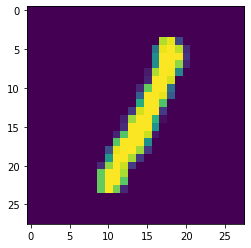

In [23]:
id=int(input("enter the index to show input image"))
show_image(id)

**creating convolutional base**

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**model summery after applling convolution and max pooling operation**

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


**adding feedforward layer to predect the output on features extracted by convolution base**

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
classes = model.predict_classes(train_images, batch_size=10)
print("Predicted class is:",classes)


Predicted class is: [2 0 2 ... 2 0 2]


In [0]:
def gen_model_for_Visualization(cnt):
  layer_outputs = [layer.output for layer in model.layers[:cnt]] 
  activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
  return activation_model

In [31]:
cnt=int(input("enter the number of layer you want to visualize"))
output=gen_model_for_Visualization(cnt)
activations =output.predict(train_images)

enter the number of layer you want to visualize5


In [32]:
print(activations[0].shape)

(60000, 26, 26, 32)


In [0]:
def visualize(id):
  from matplotlib import pyplot as plt
  import numpy as np
  layer_names = []
  for layer in model.layers[:cnt]:
      layer_names.append(layer.name) 
      
  images_per_row = 16

  for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
      n_features = layer_activation.shape[-1] 
      print("number of feature maps",n_features)  # Number of features in the feature map
      size = layer_activation.shape[1] 
      print("size",size) #The feature map has shape (1, size, size, n_features).
      n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
      display_grid = np.zeros((size * n_cols, images_per_row * size))
      for col in range(n_cols): # Tiles each filter into a big horizontal grid
          for row in range(images_per_row):
              channel_image = layer_activation[id,
                                              :, :, 
                                              col * images_per_row + row]
              channel_image -= channel_image.mean() 
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size, # Displays the grid
                          row * size : (row + 1) * size] = channel_image
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')

enter the index of input image to visualize234
number of feature maps 32
size 26
number of feature maps 32
size 13
number of feature maps 64
size 11
number of feature maps 64
size 5
number of feature maps 64
size 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


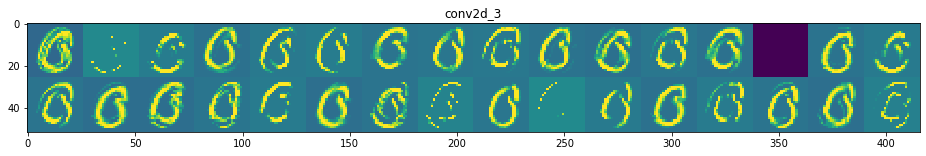

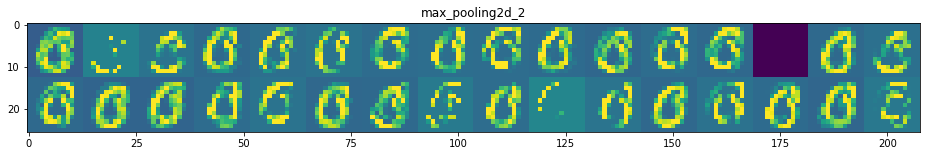

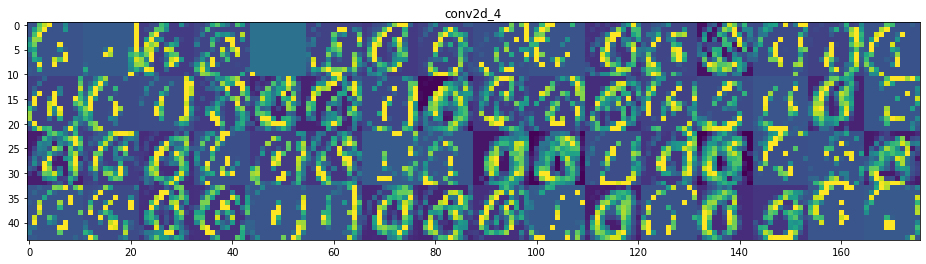

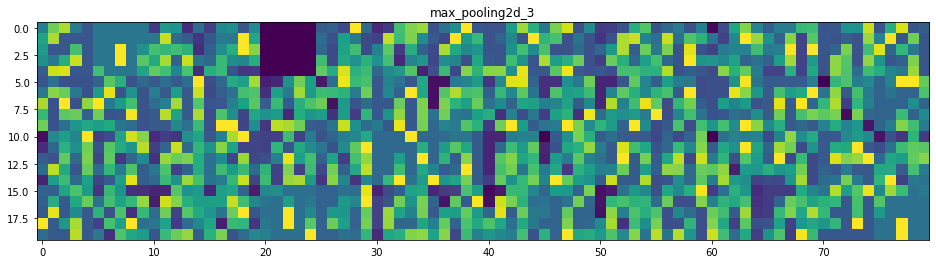

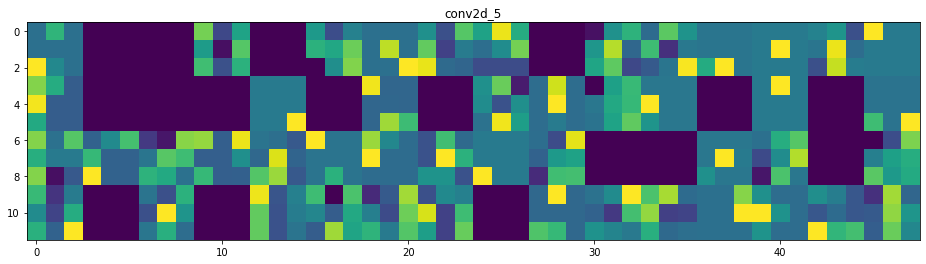

In [34]:
id=int(input("enter the index of input image to visualize"))
visualize(id)